# Notes 3


In [74]:
import duckdb
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from variables import Variables as vars

plt.style.use('../../notebook.mplstyle')

os.makedirs("./output", exist_ok=True)

In [75]:
# con.close()
con = duckdb.connect("./data/us_births.db", read_only=True)

In [76]:
meduc_df = con.execute(
    """
    SELECT b.year,
           CASE WHEN b.mage_c < 35 THEN '<35' ELSE '>=35' END as mage_group,
           b.meduc,
           COUNT(*)                                           as birth_count,
           SUM(b.down_ind)::INT as ds_recorded, SUM(b.p_ds_lb_nt) as ds_est_no_term,
           SUM(b.ds_case_weight)                               as case_weighted,
    FROM us_births as b
    GROUP BY b.year, mage_group, b.meduc
    ORDER BY b.year, mage_group, b.meduc
    """
).df()
meduc_df.to_csv(f"./output/meduc_age_group_by_year-{datetime.now().strftime("%Y%m%d%H%M")}.csv", index=False)
meduc_df

,year,mage_group,meduc,birth_count,ds_recorded,ds_est_no_term,case_weighted
0,0,<35,0,44,<NA>,0.028830,NaN
1,0,<35,<NA>,15,<NA>,0.009828,NaN
2,1989,<35,<NA>,3705383,1491,3374.286550,3078.4824
3,1989,>=35,<NA>,340310,463,2061.517526,972.0088
4,1990,<35,<NA>,3794667,1468,3474.508813,3196.5755
...,...,...,...,...,...,...,...
447,2024,>=35,5,61912,88,433.491958,220.7666
448,2024,>=35,6,219922,240,1500.735940,607.3565
449,2024,>=35,7,142069,119,1005.395800,294.4877
450,2024,>=35,8,53331,33,394.766314,82.3961


In [77]:
meduc_df = con.execute(
    """
    SELECT b.year,
           CASE
               WHEN b.mage_c < 20 THEN '<20'
               WHEN b.mage_c < 25 THEN '20-24'
               WHEN b.mage_c < 30 THEN '25-29'
               WHEN b.mage_c < 35 THEN '30-34'
               WHEN b.mage_c < 40 THEN '35-39'
               WHEN b.mage_c < 45 THEN '40-44'
               ELSE '>=45'
               END              as mage_group,
           b.meduc,
           COUNT(*)             as birth_count,
           SUM(b.down_ind)::INT as ds_recorded, SUM(b.p_ds_lb_nt) as ds_est_no_term,
           SUM(b.ds_case_weight) as case_weighted,
    FROM us_births as b
    GROUP BY b.year, mage_group, b.meduc
    ORDER BY b.year, mage_group, b.meduc
    """
).df()
meduc_df.to_csv(f"./output/meduc_age_group_2_by_year-{datetime.now().strftime("%Y%m%d%H%M")}.csv", index=False)
meduc_df

,year,mage_group,meduc,birth_count,ds_recorded,ds_est_no_term,case_weighted
0,0,<20,0,44,<NA>,0.028830,NaN
1,0,<20,<NA>,15,<NA>,0.009828,NaN
2,1989,20-24,<NA>,1078787,346,753.055609,729.1293
3,1989,25-29,<NA>,1264749,506,1054.069905,1034.0787
4,1989,30-34,<NA>,843483,457,1221.312838,921.5274
...,...,...,...,...,...,...,...
1551,2024,>=45,5,702,4,22.031013,9.8356
1552,2024,>=45,6,2757,7,86.943315,17.5254
1553,2024,>=45,7,2176,7,68.949078,17.2123
1554,2024,>=45,8,1044,1,33.243610,2.4589


In [78]:
meduc_df = con.execute(
    """
    SELECT b.year,
           CASE WHEN b.mage_c < 35 THEN '<35' ELSE '>=35' END as mage_group,
           CASE
               WHEN b.meduc < 6 THEN 'Less than BA'
               WHEN b.meduc > 6 AND b.meduc < 9 THEN 'BA or higher'
               ELSE NULL
               END              as meduc_group,
           CASE
               WHEN b.mracehisp_c = 1 THEN 'NH White'
               WHEN b.mracehisp_c = 2 THEN 'NH Black'
               WHEN b.mracehisp_c = 3 THEN 'NH AI/AN'
               WHEN b.mracehisp_c = 4 THEN 'NH Asian/PI'
               WHEN b.mracehisp_c = 5 THEN 'Hispanic'
               ELSE NULL
               END              as race_ethnicity,
           COUNT(*)             as birth_count,
           SUM(b.down_ind)::INT as ds_recorded, SUM(b.p_ds_lb_nt) as ds_est_no_term,
           SUM(b.ds_case_weight) as case_weighted,
    FROM us_births as b
    WHERE b.year >= 2003
    GROUP BY b.year, mage_group, meduc_group, race_ethnicity
    ORDER BY b.year, mage_group, meduc_group, race_ethnicity
    """
).df()
meduc_df.to_csv(f"./output/meduc_age_group_3_by_year-{datetime.now().strftime("%Y%m%d%H%M")}.csv", index=False)
meduc_df

,year,mage_group,meduc_group,race_ethnicity,birth_count,ds_recorded,ds_est_no_term,case_weighted
0,2003,<35,BA or higher,Hispanic,323,0,0.416603,0.0000
1,2003,<35,BA or higher,NH AI/AN,15,0,0.018804,0.0000
2,2003,<35,BA or higher,NH Asian/PI,679,0,0.783317,0.0000
3,2003,<35,BA or higher,NH Black,423,0,0.526538,0.0000
4,2003,<35,BA or higher,NH White,11136,3,14.971855,7.0362
...,...,...,...,...,...,...,...,...
667,2024,>=35,BA or higher,None,175063,142,1250.880947,349.1638
668,2024,>=35,Less than BA,Hispanic,117249,232,871.340837,643.1040
669,2024,>=35,Less than BA,None,224983,391,1608.538249,961.4299
670,2024,>=35,None,Hispanic,37105,63,264.299666,174.6360


In [79]:
meduc_df = con.execute(
    f"""
    SELECT b.year,
           CASE WHEN b.mage_c < 35 THEN '<35' ELSE '>=35' END as mage_group,
           CASE
               WHEN b.meduc < 6 THEN 'Less than BA'
               WHEN b.meduc > 6 AND b.meduc < 9 THEN 'BA or higher'
               ELSE NULL
           END as meduc_group,
           CASE
                WHEN {vars.BMI} >= 70 THEN NULL
                WHEN {vars.BMI} < 30 THEN 'BMI<30'
                WHEN {vars.BMI} >= 30 THEN 'BMI>=30'
                ELSE NULL
           END as bmi_group,
           COUNT(*)             as birth_count,
           SUM(b.down_ind)::INT as ds_recorded, SUM(b.p_ds_lb_nt) as ds_est_no_term,
           SUM(b.ds_case_weight) as case_weighted,
    FROM us_births as b
    WHERE b.year >= 2009
        AND b.bmi >= 13.0 AND b.bmi < 99.0
    GROUP BY b.year, mage_group, meduc_group, bmi_group
    ORDER BY b.year, mage_group, meduc_group, bmi_group
    """
).df()
meduc_df.to_csv(f"./output/meduc_age_group_4_by_year-{datetime.now().strftime("%Y%m%d%H%M")}.csv", index=False)
meduc_df

,year,mage_group,meduc_group,bmi_group,birth_count,ds_recorded,ds_est_no_term,case_weighted
0,2009,<35,BA or higher,BMI<30,137260,45,177.672649,111.9410
1,2009,<35,BA or higher,BMI>=30,18766,6,24.291089,16.1386
2,2009,<35,Less than BA,BMI<30,1330886,386,1151.456792,1053.0318
3,2009,<35,Less than BA,BMI>=30,434268,155,399.008274,424.0270
4,2009,<35,None,BMI<30,311970,122,353.581088,302.4698
...,...,...,...,...,...,...,...,...
187,2024,>=35,BA or higher,BMI>=30,42393,44,316.711752,108.1916
188,2024,>=35,Less than BA,BMI<30,191676,346,1393.486895,888.9776
189,2024,>=35,Less than BA,BMI>=30,140866,249,1012.312190,641.3844
190,2024,>=35,None,BMI<30,170573,174,1174.792172,438.1809


In [80]:
meduc_df = con.execute(
    f"""
    SELECT b.year,
           CASE
               WHEN b.mage_c < 20 THEN '<20'
               WHEN b.mage_c < 25 THEN '20-24'
               WHEN b.mage_c < 30 THEN '25-29'
               WHEN b.mage_c < 35 THEN '30-34'
               WHEN b.mage_c < 40 THEN '35-39'
               WHEN b.mage_c < 45 THEN '40-44'
               ELSE '>=45'
           END              as mage_group,
           CASE
               WHEN b.meduc < 6 THEN 'Less than BA'
               WHEN b.meduc > 6 AND b.meduc < 9 THEN 'BA or higher'
               ELSE NULL
           END as meduc_group,
           CASE
                WHEN {vars.BMI} >= 70 THEN NULL
                WHEN {vars.BMI} < 30 THEN 'BMI<30'
                WHEN {vars.BMI} >= 30 THEN 'BMI>=30'
                ELSE NULL
           END as bmi_group,
           COUNT(*)             as birth_count,
           SUM(b.down_ind)::INT as ds_recorded, SUM(b.p_ds_lb_nt) as ds_est_no_term,
           SUM(b.ds_case_weight) as case_weighted,
    FROM us_births as b
    WHERE b.year >= 2009
        AND b.bmi >= 13.0 AND b.bmi < 99.0
    GROUP BY b.year, mage_group, meduc_group, bmi_group
    ORDER BY b.year, mage_group, meduc_group, bmi_group
    """
).df()
meduc_df.to_csv(f"./output/meduc_age_group_5_by_year-{datetime.now().strftime("%Y%m%d%H%M")}.csv", index=False)
meduc_df

,year,mage_group,meduc_group,bmi_group,birth_count,ds_recorded,ds_est_no_term,case_weighted
0,2009,20-24,BA or higher,BMI<30,2014,1,1.439729,2.3120
1,2009,20-24,BA or higher,BMI>=30,314,0,0.224401,0.0000
2,2009,20-24,Less than BA,BMI<30,472638,134,329.202866,365.5204
3,2009,20-24,Less than BA,BMI>=30,144932,33,101.212270,95.8360
4,2009,20-24,None,BMI<30,28536,12,20.251107,30.7358
...,...,...,...,...,...,...,...,...
653,2024,>=45,BA or higher,BMI>=30,779,2,24.728413,4.9178
654,2024,>=45,Less than BA,BMI<30,2529,21,78.633663,54.7679
655,2024,>=45,Less than BA,BMI>=30,1609,10,49.562457,26.1545
656,2024,>=45,None,BMI<30,2412,6,76.671934,15.0665


In [81]:
bmi_df = con.execute(
    f"""
    SELECT b.bmi as bmi,
           COUNT(*)             as birth_count,
           SUM(b.down_ind)::INT as ds_recorded,
           SUM(b.p_ds_lb_nt) as ds_est_no_term,
           (SUM(b.down_ind) / COUNT(*)) * 10000 as prevalence_recorded
    FROM us_births as b
    WHERE b.bmi >= 13.0 and b.bmi < 99.0
    GROUP BY b.bmi
    ORDER BY bmi
    """
).df()
bmi_df

,bmi,birth_count,ds_recorded,ds_est_no_term,prevalence_recorded
0,13.000000,164,0,0.307393,0.0
1,13.100000,335,0,0.524467,0.0
2,13.200000,561,0,0.849916,0.0
3,13.300000,848,0,1.234961,0.0
4,13.400000,521,0,0.800800,0.0
...,...,...,...,...,...
565,69.500000,53,0,0.092297,0.0
566,69.599998,8,0,0.018331,0.0
567,69.699997,26,0,0.034108,0.0
568,69.800003,10,0,0.024046,0.0


Text(0, 0.5, 'DS prevalence recorded per 10,000 births')

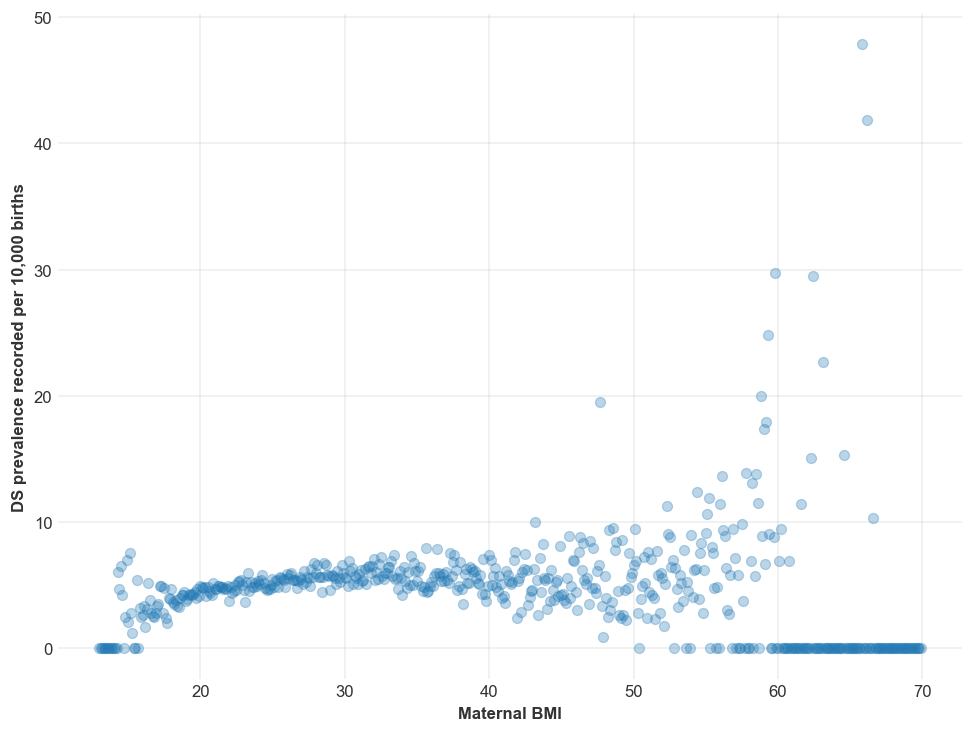

In [82]:
plt.scatter(bmi_df['bmi'], bmi_df['prevalence_recorded'], alpha=0.3)
plt.xlabel("Maternal BMI")
plt.ylabel("DS prevalence recorded per 10,000 births")

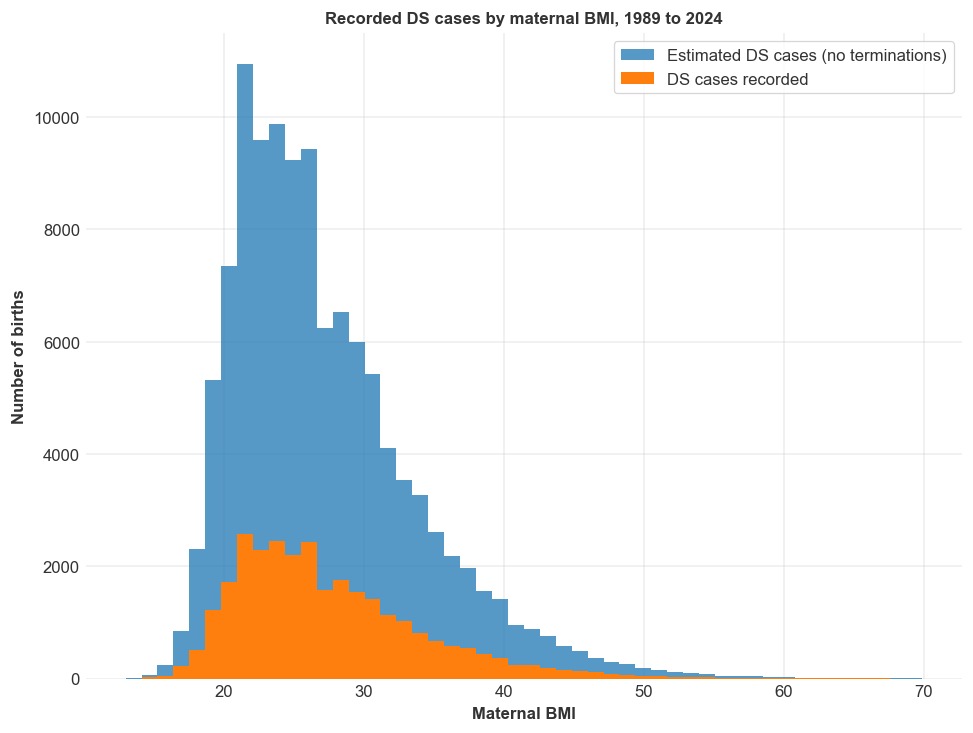

In [83]:
# histogram of maternal BMI
plt.hist(bmi_df['bmi'], bins=50, weights=bmi_df['ds_est_no_term'], label="Estimated DS cases (no terminations)", alpha=0.75)
plt.hist(bmi_df['bmi'], bins=50, weights=bmi_df['ds_recorded'], label="DS cases recorded")
plt.xlabel("Maternal BMI")
plt.ylabel("Number of births")
plt.title("Recorded DS cases by maternal BMI, 1989 to 2024")
plt.legend()

In [84]:
bmi_df = con.execute(
    f"""
    SELECT b.year,
           count(b.bmi),
           count(b.bmi_r),
           count(b.pwgt_r),
           count(b.dwgt_r),
           count(b.wtgain),
           count(b.wtgain_rec),
           count(b.m_ht_in)
    FROM us_births as b
    GROUP BY b.year
    ORDER BY year
    """
).df()
bmi_df.to_csv(f"./output/bmi_height_weight_by_year-{datetime.now().strftime("%Y%m%d%H%M")}.csv", index=False)
bmi_df

,year,count(b.bmi),count(b.bmi_r),count(b.pwgt_r),count(b.dwgt_r),count(b.wtgain),count(b.wtgain_rec),count(b.m_ht_in)
0,0,54,54,54,44,59,54,54
1,1989,0,0,0,0,4045693,0,0
2,1990,0,0,0,0,4162917,0,0
3,1991,0,0,0,0,4115342,0,0
4,1992,0,0,0,0,4069428,0,0
5,1993,0,0,0,0,4004523,0,0
6,1994,0,0,0,0,3956925,0,0
7,1995,0,0,0,0,3903012,0,0
8,1996,0,0,0,0,3894874,0,0
9,1997,0,0,0,0,3884329,0,0


In [85]:
con.close()